# Toxic Comment Detection - Exploratory Data Analysis (EDA)

In [10]:
# 1. Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# 2. Load Dataset
df = pd.read_csv('../../data/raw/train.csv')
df = df.dropna(subset=['comment_text'])

In [12]:
# 3. Target Labels
LABELS = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
df[LABELS] = df[LABELS].fillna(0).astype(int)

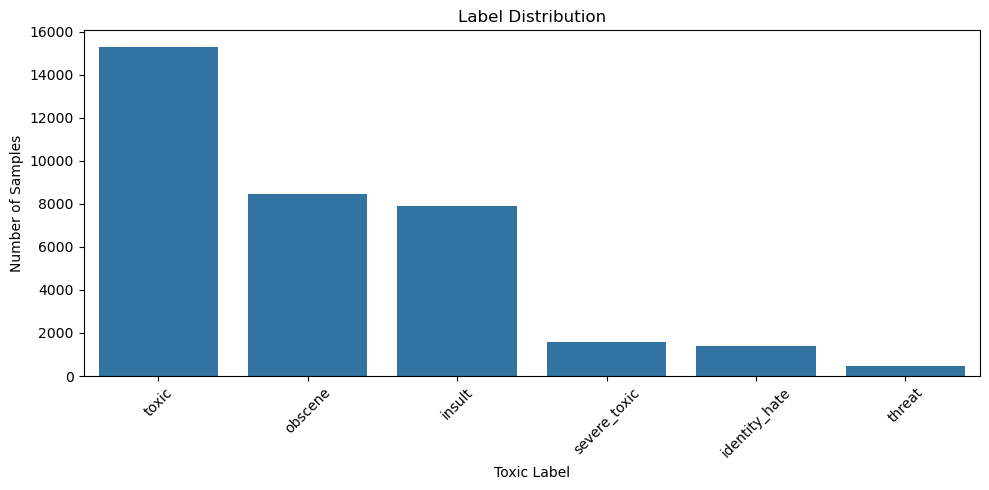

In [13]:
# 4. Label Distribution
label_counts = df[LABELS].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title("Label Distribution")
plt.ylabel("Number of Samples")
plt.xlabel("Toxic Label")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Samples with multiple labels:
 num_labels
0    143346
1      6360
2      3480
3      4209
4      1760
5       385
6        31
Name: count, dtype: int64


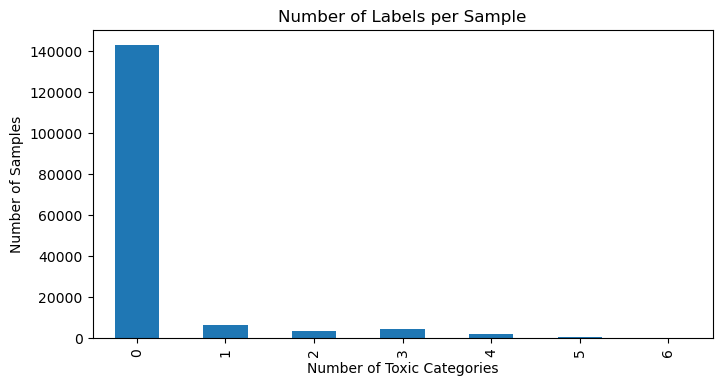

In [14]:
# 5. Multi-label Stats
df['num_labels'] = df[LABELS].sum(axis=1)
multi_label_counts = df['num_labels'].value_counts().sort_index()
print("Samples with multiple labels:\n", multi_label_counts)

multi_label_counts.plot(kind='bar', figsize=(8, 4), title="Number of Labels per Sample")
plt.xlabel("Number of Toxic Categories")
plt.ylabel("Number of Samples")
plt.show()

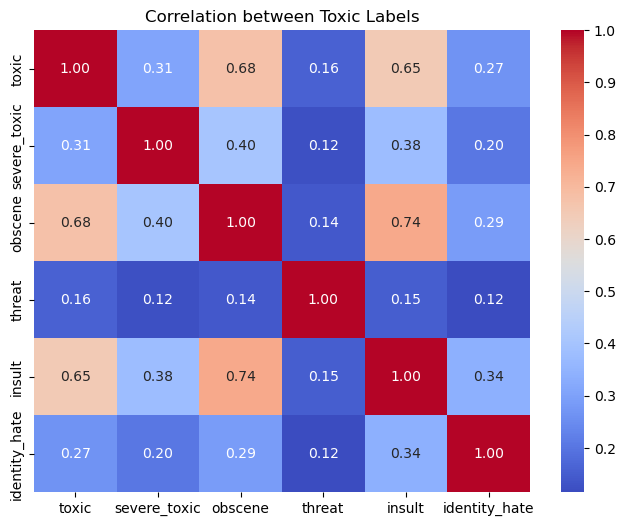

In [15]:
# 6. Correlation Between Labels
corr = df[LABELS].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Toxic Labels")
plt.show()

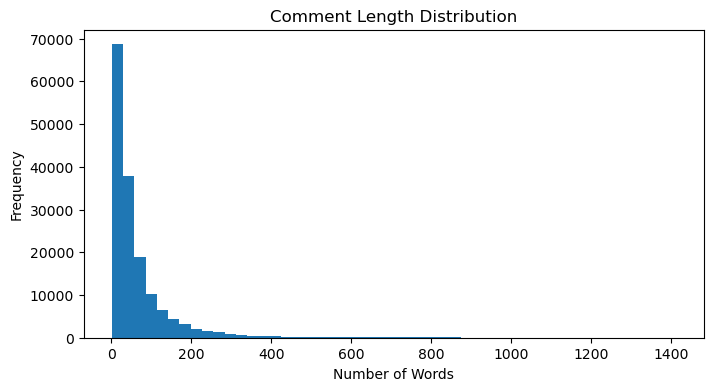

In [16]:
# 7. Comment Length Distribution
df['text_length'] = df['comment_text'].apply(lambda x: len(x.split()))
df['text_length'].plot(kind='hist', bins=50, figsize=(8, 4), title="Comment Length Distribution")
plt.xlabel("Number of Words")
plt.show()

In [17]:
# 8. Example Comments Per Label
for label in LABELS:
    print(f"\nExamples for label: {label}")
    print(df[df[label] == 1]['comment_text'].sample(2, random_state=4).values)


Examples for label: toxic
['Fuck off you nazi loving cunt'
 'How many niggers does it take to change a light bulb???']

Examples for label: severe_toxic
["your hair is lower then your mum's tits" 'Ima fuck your mother.']

Examples for label: obscene
['And who ever wrote this shyt bout this nigga is a fuck nigga to i dont give a shyt bout his middle name hoe'
 'OKAY BUDDY you are a MEANY u make me cry. so i am here to tell you that u can suck my balls cause you are making me have no fun. Oh and also ur moms a total babe, tell her to give me a call sometime. And oh i left my wallet there so make sure u reaturn it please. Alright thanks bye.']

Examples for label: threat
['Are you wikistalking me you fucking aspie? Either crawl back to your hugbox or hang yourself.'
 "Hi, fuckwit. You do know that by blocking me you are violating basic human rights and freedom of expression. And by you deleting my rant is just plain ridicilous. That just proves that all you are is a bunch of fascist douc

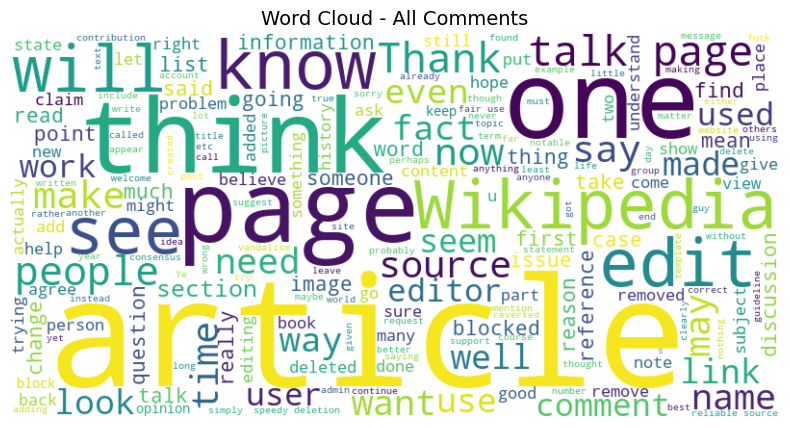

In [18]:
from wordcloud import WordCloud

# Function to generate word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        max_words=200
    ).generate(' '.join(text))
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=14)
    plt.show()

# WordCloud for all comments
generate_wordcloud(df['comment_text'], "Word Cloud - All Comments")
